### 7.1 优化与深度学习
* 优化与深度学习的关系
    - 优化目标在于降低训练误差
    - 深度学习的目标在于降低泛化误差
* 优化在深度学习中的挑战
    - 局部最小值
    - 鞍点
        - 深度学习模型参数通常是高维的，目标函数的鞍点通常比局部最小值更常见

### 7.2 梯度下降和随机梯度下降
* 使用适当的学习率，沿着梯度反方向更新自变量可能降低目标函数值
* 学习率过大或过小都有问题，合适的学习率需要多次实验找到
* 训练数据集的样本较多时，梯度下降每次迭代的计算开销比较大，使用随机梯度下降

In [88]:
%matplotlib inline
from mpl_toolkits import mplot3d
import numpy as np
import math
import torch
import d2lzh_pytorch as d2l
import time
from torch import nn, optim

In [7]:
# 一维梯度下降
# y = x ** 2
def gd(eta):
    x = 10
    results = [x]
    for i in range(10):
        x -= eta * 2 * x
        results.append(x)
    print('epoch 10, x:', x)
    return results

In [11]:
res = gd(0.2)
print(res)

epoch 10, x: 0.06046617599999997
[10, 6.0, 3.5999999999999996, 2.1599999999999997, 1.2959999999999998, 0.7775999999999998, 0.46655999999999986, 0.2799359999999999, 0.16796159999999993, 0.10077695999999996, 0.06046617599999997]


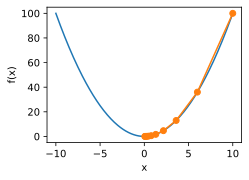

In [10]:
def show_trace(res):
    n = max(abs(min(res)), abs(max(res)), 10)
    f_line = np.arange(-n, n, 0.1)
    d2l.set_figsize()
    d2l.plt.plot(f_line, [x * x for x in f_line])
    d2l.plt.plot(res, [x * x for x in res], '-o')
    d2l.plt.xlabel('x')
    d2l.plt.ylabel('f(x)')
show_trace(res)

epoch 10, x: 3.4867844009999995


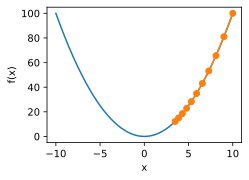

In [12]:
# 学习率
show_trace(gd(0.05))

epoch 10, x: 61.917364224000096


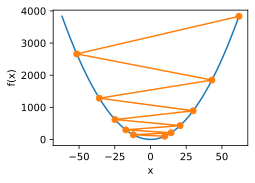

In [13]:
show_trace(gd(1.1))

In [239]:
# 多维梯度下降
# f(x) = x1^2 + 2 * x2 ^ 2
# df(x) = [2x1, 4x2]
def train_2d(trainer):
    x1, x2, s1, s2 = -5, -2, 0, 0
    results = [(x1, x2)]
    for i in range(20):
        x1, x2, s1, s2 = trainer(x1, x2, s1, s2)
        results.append((x1, x2))
        #print('epoch %d, x1 %f, x2 %f' % (i + 1, x1, x2))
    return results

In [18]:
def show_trace_2d(f, results):
    d2l.plt.plot(*zip(*results), '-o', color='#ff7f0e')
    x1, x2 = np.meshgrid(np.arange(-5.5, 1.0, 0.1),
                        np.arange(-3.0, 1.0, 0.1))
    d2l.plt.contour(x1, x2, f(x1, x2), color='#1f77b4')
    d2l.plt.xlabel('x1')
    d2l.plt.ylabel('x2')

epoch 1, x1 -4.000000, x2 -1.200000
epoch 2, x1 -3.200000, x2 -0.720000
epoch 3, x1 -2.560000, x2 -0.432000
epoch 4, x1 -2.048000, x2 -0.259200
epoch 5, x1 -1.638400, x2 -0.155520
epoch 6, x1 -1.310720, x2 -0.093312
epoch 7, x1 -1.048576, x2 -0.055987
epoch 8, x1 -0.838861, x2 -0.033592
epoch 9, x1 -0.671089, x2 -0.020155
epoch 10, x1 -0.536871, x2 -0.012093
epoch 11, x1 -0.429497, x2 -0.007256
epoch 12, x1 -0.343597, x2 -0.004354
epoch 13, x1 -0.274878, x2 -0.002612
epoch 14, x1 -0.219902, x2 -0.001567
epoch 15, x1 -0.175922, x2 -0.000940
epoch 16, x1 -0.140737, x2 -0.000564
epoch 17, x1 -0.112590, x2 -0.000339
epoch 18, x1 -0.090072, x2 -0.000203
epoch 19, x1 -0.072058, x2 -0.000122
epoch 20, x1 -0.057646, x2 -0.000073


/Users/dongdong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'color'
  """


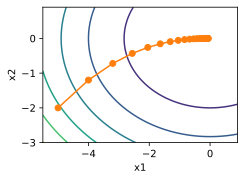

In [19]:
eta = 0.1
def f_2d(x1, x2):
    return x1 ** 2 + 2 * x2 ** 2
def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 2 * x1, x2 - eta * 4 * x2, 0, 0)

show_trace_2d(f_2d, train_2d(gd_2d))

epoch 1, x1 -4.007372, x2 -1.256164
epoch 2, x1 -3.020815, x2 -0.812921
epoch 3, x1 -2.451579, x2 -0.456885
epoch 4, x1 -2.015381, x2 -0.139261
epoch 5, x1 -1.717921, x2 0.163059
epoch 6, x1 -1.445216, x2 0.128310
epoch 7, x1 -1.143753, x2 -0.030950
epoch 8, x1 -0.960362, x2 -0.136614
epoch 9, x1 -0.838248, x2 -0.077709
epoch 10, x1 -0.755360, x2 -0.209215
epoch 11, x1 -0.445909, x2 -0.073711
epoch 12, x1 -0.346521, x2 -0.034628
epoch 13, x1 -0.213195, x2 -0.034424
epoch 14, x1 -0.135909, x2 -0.180219
epoch 15, x1 -0.249881, x2 -0.155029
epoch 16, x1 -0.359959, x2 -0.057526
epoch 17, x1 -0.229709, x2 0.121315
epoch 18, x1 -0.131472, x2 0.046103
epoch 19, x1 -0.182157, x2 -0.065855
epoch 20, x1 -0.061510, x2 -0.006449


/Users/dongdong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'color'
  """


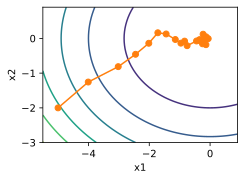

In [22]:
# 随机梯度下降
def sgd_2d(x1, x2, s1, s2):
    return (x1 - eta * (2 * x1 + np.random.normal(0.1)),
            x2 - eta * (4 * x2 + np.random.normal(0.1)),
            0, 0)
show_trace_2d(f_2d, train_2d(sgd_2d))

### 7.3 小批量随机梯度下降

In [211]:
def get_data():
    data = np.genfromtxt('data/airfoil_self_noise.dat', 
                         delimiter='\t')
    data = (data - data.mean(axis=0)) / data.std(axis=0)
    return torch.tensor(data[:1500, :-1],
                        dtype=torch.float32), \
           torch.tensor(data[:1500, -1], 
                        dtype=torch.float32)
features, labels = get_data()
features.shape, labels.shape

(torch.Size([1500, 5]), torch.Size([1500]))

In [214]:
def sgd(params, states, hyperparams):
    # print('sgd', params, hyperparams)
    for p in params:
        p.data -= hyperparams['lr'] * p.grad.data

In [215]:
def linreg(X, w, b):
    return torch.mm(X, w) + b
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2

In [216]:
def train_ch7(optimizer_fn, states, hyperparams, features,
              labels, batch_size=10, num_epochs=2):
    net, loss = linreg, squared_loss
    w = torch.nn.Parameter(torch.tensor(
            np.random.normal(0, 0.01, 
                         size=(features.shape[1], 1)),
        dtype=torch.float32), requires_grad=True)
    b = torch.nn.Parameter(torch.zeros(1, 
            dtype=torch.float32), requires_grad=True)
    def eval_loss():
        return loss(net(features, w, b), labels).mean(
                ).item()
    ls = [eval_loss()]
    data_iter = torch.utils.data.DataLoader(
            torch.utils.data.TensorDataset(features, 
                                           labels),
            batch_size, shuffle=True)
    for _ in range(num_epochs):
        start = time.time()
        for batch_i, (X, y) in enumerate(data_iter):
            l = loss(net(X, w, b), y).mean()
            if w.grad is not None:
                w.grad.data.zero_()
                b.grad.data.zero_()
            l.backward()
            optimizer_fn([w, b], states, hyperparams)
            #print('batch %d, loss %f' % (batch_i, l.item()))
            if (batch_i + 1) * batch_size % 100 == 0:
                ls.append(eval_loss())
        print('loss: %f, %f sec per epoch' % (ls[-1], 
                time.time() - start))
    d2l.set_figsize()
    d2l.plt.plot(np.linspace(0, num_epochs, len(ls)), ls)
    d2l.plt.xlabel('epoch')
    d2l.plt.ylabel('loss')            

In [217]:
def train_sgd(lr, batch_size, num_epochs=2):
    train_ch7(sgd, None, {'lr':lr}, features, labels,
              batch_size, num_epochs)

loss: 0.275438, 0.019617 sec per epoch
loss: 0.249435, 0.019868 sec per epoch
loss: 0.245355, 0.025504 sec per epoch
loss: 0.244104, 0.084738 sec per epoch
loss: 0.243439, 0.030924 sec per epoch
loss: 0.243029, 0.018729 sec per epoch


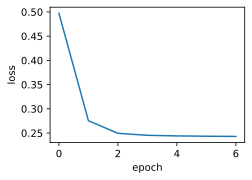

In [220]:
train_sgd(1, 1500, 6)

loss: 0.243955, 0.567858 sec per epoch
loss: 0.243428, 0.798961 sec per epoch


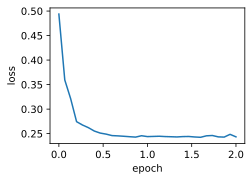

In [222]:
train_sgd(0.005, 1)

loss: 0.247508, 0.102755 sec per epoch
loss: 0.245520, 0.072949 sec per epoch


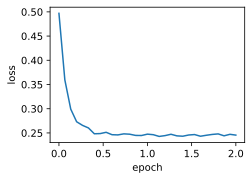

In [223]:
train_sgd(0.05, 10)

In [224]:
# 简洁实现
def train_pytorch_ch7(optimizer_fn, optimizer_hyperparams,
                     features, labels, batch_size=10,
                     num_epochs=2):
    net = nn.Sequential(
        nn.Linear(features.shape[-1], 1)
    )
    loss = nn.MSELoss()
    optimizer = optimizer_fn(net.parameters(), 
                             **optimizer_hyperparams)
    
    def eval_loss():
        return loss(net(features).view(-1), labels
                   ).item() / 2
    
    ls = [eval_loss()]
    data_iter = torch.utils.data.DataLoader(
        torch.utils.data.TensorDataset(features, labels),
        batch_size, shuffle=True)
    
    for _ in range(num_epochs):
        start = time.time()
        for batch_i, (X, y) in enumerate(data_iter):
            l = loss(net(X).view(-1), y) / 2
            optimizer.zero_grad()
            l.backward()
            optimizer.step()
            if (batch_i + 1) * batch_size % 100 == 0:
                ls.append(eval_loss())
                
        print('loss: %f, %f sec per epoch' % (ls[-1], 
                time.time() - start))
         
    d2l.set_figsize()
    d2l.plt.plot(np.linspace(0, num_epochs, len(ls)),
                     ls)
    d2l.plt.xlabel('epoch')
    d2l.plt.ylabel('loss')

loss: 0.246059, 0.082263 sec per epoch
loss: 0.243520, 0.092273 sec per epoch


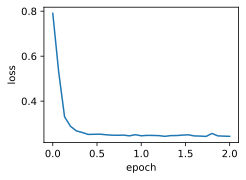

In [226]:
train_pytorch_ch7(optim.SGD, {'lr': 0.05}, 
                  features, labels, 10)

In [95]:
features.shape, labels.shape

(torch.Size([1500, 5]), torch.Size([1500]))

### 7.4 动量法
* 动量法使用了指数加权移动平均的思想
    - 将过去时间步的梯度做了加权平均，且权重按时间步指数衰减
* 动量法使得相邻时间的自变量更新在方向上更加一致

##### 梯度下降问题

/Users/dongdong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'color'
  """


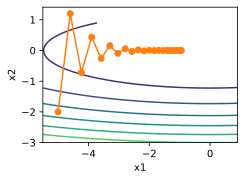

In [240]:
def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2
def gd_2d(x1, x2, s1, s2):
    return (x1 - eta * 0.2 * x1, 
            x2 - eta * 4 * x2, 
            0, 0)
eta = 0.4
show_trace_2d(f_2d, train_2d(gd_2d))

/Users/dongdong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'color'
  """


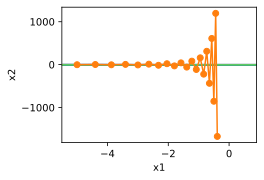

In [241]:
eta = 0.6
show_trace_2d(f_2d, train_2d(gd_2d))

In [242]:
def momentum_2d(x1, x2, v1, v2):
    v1 = gamma * v1 + eta * 0.2 * x1
    v2 = gamma * v2 + eta * 4 * x2
    return x1 - v1, x2 - v2, v1, v2

/Users/dongdong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'color'
  """


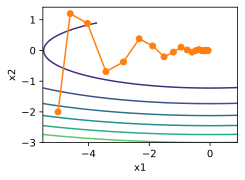

In [243]:
eta, gamma = 0.4, 0.5
show_trace_2d(f_2d, train_2d(momentum_2d))

/Users/dongdong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'color'
  """


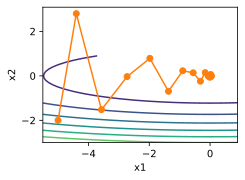

In [244]:
eta = 0.6
show_trace_2d(f_2d, train_2d(momentum_2d))

##### 指数加权移动平均 exponentially weighted moving average
```
y(t) = eta * y(t-1) + (1 - eta) * x(t)
     = (1 - eta) * x(t) + 
       (1 - eta) * eta * x(t - 1) + 
       (1 - eta) * eta ^ 2 * x(t - 2) + 
       eta ^ 3 * y(t - 3)
```    
例eta = 0.9时，可以看作对最近10个时间步的x(t)值的加权平均

In [245]:
features, labels = get_data()
print(features.shape, labels.shape)

torch.Size([1500, 5]) torch.Size([1500])


In [250]:
def init_momentum_states():
    v_w = torch.zeros((features.shape[1], 1),
                      dtype=torch.float32)
    v_b = torch.zeros(1, dtype=torch.float32)
    return (v_w, v_b)
def sgd_momentum(params, states, hyperparams):
    for p, v in zip(params, states):
        v.data = (hyperparams['momentum'] * v.data +
                  hyperparams['lr'] * p.grad.data)
        p.data -= v.data

loss: 0.244503, 0.122314 sec per epoch
loss: 0.242171, 0.082493 sec per epoch


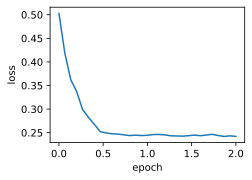

In [251]:
train_ch7(sgd_momentum, init_momentum_states(), 
         {'lr': 0.02, 'momentum': 0.5}, features, labels)

loss: 0.246680, 0.079801 sec per epoch
loss: 0.254272, 0.089297 sec per epoch


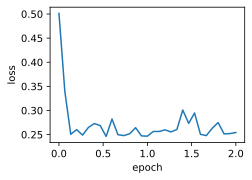

In [253]:
train_ch7(sgd_momentum, init_momentum_states(), 
         {'lr': 0.02, 'momentum': 0.9}, features, labels)

loss: 0.244080, 0.080436 sec per epoch
loss: 0.244075, 0.090634 sec per epoch


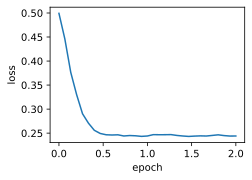

In [255]:
train_ch7(sgd_momentum, init_momentum_states(), 
         {'lr': 0.004, 'momentum': 0.9}, features, labels)

loss: 0.245016, 0.090787 sec per epoch
loss: 0.249531, 0.084439 sec per epoch


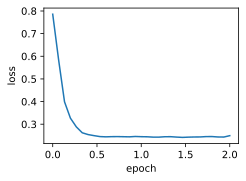

In [257]:
# 简洁实现: 只需要通过参数momentum指定动量超参数即可使用动量法
train_pytorch_ch7(torch.optim.SGD, 
                  {'lr': 0.004, 'momentum': 0.9}, 
                  features, 
                  labels)

### 7.5 AdaGrad
* 根据自变量在每个维度的梯度值大小来调整各个维度上的学习率，从而避免统一的学习率难以适应所有维度的问题
* AdaGrad在迭代过程中不断调整学习率，并让目标函数自变量中每个元素都分别拥有自己的学习率
* 使用AdaGrad算法时，自变量中每个元素的学习率在迭代过程中一直在降低（或不变）
* AdaGrad算法在迭代后期由于学习率过小，可能较难找到一个有用的解

In [258]:
def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2
def adagrad_2d(x1, x2, s1, s2):
    # 自变量梯度
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 += g1 ** 2
    s2 += g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

/Users/dongdong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'color'
  """


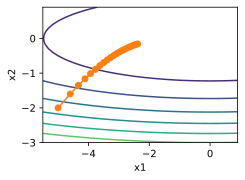

In [259]:
eta = 0.4
show_trace_2d(f_2d, train_2d(adagrad_2d))

/Users/dongdong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'color'
  """


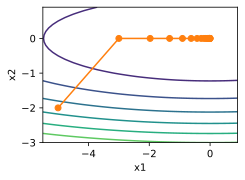

In [260]:
eta = 2
show_trace_2d(f_2d, train_2d(adagrad_2d))

In [261]:
def init_adagrad_states():
    s_w = torch.zeros((features.shape[1], 1), 
                      dtype=torch.float32)
    s_b = torch.zeros(1, dtype=torch.float32)
    return (s_w, s_b)
def adagrad(params, states, hyperparams):
    eps = 1e-6
    for p, s in zip(params, states):
        s.data += (p.grad.data ** 2)
        p.data -= (hyperparams['lr'] * p.grad.data /
                   torch.sqrt(s + eps)) 

loss: 0.242778, 0.310236 sec per epoch
loss: 0.242439, 0.073718 sec per epoch


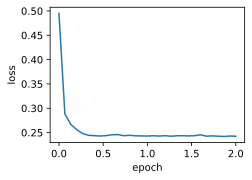

In [262]:
train_ch7(adagrad, init_adagrad_states(), {'lr': 0.1},
         features, labels)

loss: 0.245840, 0.119126 sec per epoch
loss: 0.242446, 0.072679 sec per epoch


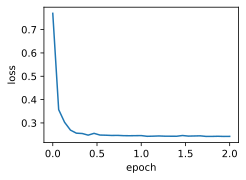

In [264]:
# 简洁实现
train_pytorch_ch7(torch.optim.Adagrad, {'lr': 0.1}, 
              features, labels)

### 7.6 RMSProp
* 和AdaGrad算法一样，RMSProp算法将目标函数自变量中每个元素的学习率通过按元素运算重新调整，更新自变量
* 和AdaGrad的不同在于，RMSProp算法使用了小批量随机梯度按元素平方的指数加权移动平均来调整学习率
* 自变量每个元素的学习率在迭代过程中不再一直降低或不变
* RMSProp可以更快逼近最优解

In [265]:
def f_2d(x1, x2):
    return 0.1 * x1 ** 2 + 2 * x2 ** 2
def rmsprop_2d(x1, x2, s1, s2):
    g1, g2, eps = 0.2 * x1, 4 * x2, 1e-6
    s1 = gamma * s1 + (1 - gamma) * g1 ** 2
    s2 = gamma * s2 + (1 - gamma) * g2 ** 2
    x1 -= eta / math.sqrt(s1 + eps) * g1
    x2 -= eta / math.sqrt(s2 + eps) * g2
    return x1, x2, s1, s2

/Users/dongdong/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: The following kwargs were not used by contour: 'color'
  """


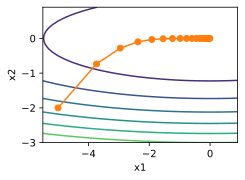

In [266]:
eta, gamma = 0.4, 0.9
show_trace_2d(f_2d, train_2d(rmsprop_2d))

In [270]:
def init_rmsprop_states():
    s_w = torch.zeros((features.shape[1], 1), 
                      dtype=torch.float32)
    s_b = torch.zeros(1, dtype=torch.float32)
    return (s_w, s_b)

def rmsprop(params, states, hyperparams):
    gamma, eps = hyperparams['gamma'], 1e-6
    for p, s in zip(params, states):
        s.data = (gamma * s.data + 
                  (1 - gamma) * p.grad.data ** 2)
        p.data -= (hyperparams['lr'] * p.grad.data / 
                   torch.sqrt(s + eps))

loss: 0.245393, 0.123569 sec per epoch
loss: 0.244235, 0.105676 sec per epoch


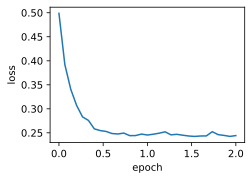

In [271]:
train_ch7(rmsprop, init_rmsprop_states(), 
          {'lr': 0.01, 'gamma': 0.9}, 
          features, labels)

loss: 0.245257, 0.106793 sec per epoch
loss: 0.242327, 0.085694 sec per epoch


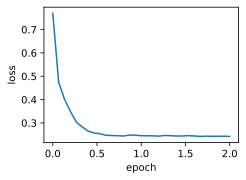

In [273]:
# 简洁实现
train_pytorch_ch7(torch.optim.RMSprop, 
                  {'lr': 0.01, 'alpha': 0.9},
                  features, labels)

### 7.7 AdaDelta
* AdaDelta也是针对AdaGrad算法在迭代后期可能较难找到有用解的问题做了改进
* AdaDelta算法没有学习率
* AdaDelta与RMSProp算法的不同之处在于使用sqrt(delta_x(t-1))来替代学习率

In [274]:
def init_adadelta_states():
    s_w = torch.zeros((features.shape[1], 1), 
                      dtype=torch.float32)
    s_b = torch.zeros(1, dtype=torch.float32)
    delta_w = torch.zeros((features.shape[1], 1), 
                          dtype=torch.float32)
    delta_b = torch.zeros(1, dtype=torch.float32)
    return ((s_w, delta_w), (s_b, delta_b))

def adadelta(params, states, hyperparams):
    rho, eps = hyperparams['rho'], 1e-5
    for p, (s, delta) in zip(params, states):
        s[:] = rho * s + (1 - rho) * (p.grad.data ** 2)
        g = p.grad.data * torch.sqrt(
            (delta + eps) / (s + eps))
        p.data -= g
        delta[:] = rho* delta + (1 - rho) * g * g

loss: 0.247235, 0.120172 sec per epoch
loss: 0.243367, 0.120957 sec per epoch


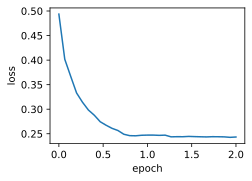

In [275]:
train_ch7(adadelta, init_adadelta_states(), 
          {'rho': 0.9}, features, labels)

loss: 0.295357, 0.092108 sec per epoch
loss: 0.248081, 0.100142 sec per epoch


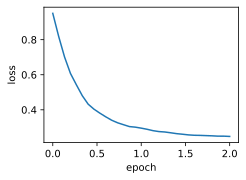

In [286]:
# 简洁实现
train_pytorch_ch7(torch.optim.Adadelta, {'rho': 0.975}, 
                  features, labels)

### 7.8 Adam
* Adam算法在RMSProp算法基础上对小批量随机梯度也做了指数加权移动平均
* Adam算法可以看做是RMSProp算法和动量法的结合
* Adam算法使用了偏差修正

In [287]:
def init_adam_states():
    v_w, v_b = (torch.zeros((features.shape[1], 1), 
                            dtype=torch.float32),
                torch.zeros(1, dtype=torch.float32))
    s_w, s_b = (torch.zeros((features.shape[1], 1), 
                            dtype=torch.float32),
                torch.zeros(1, dtype=torch.float32))
    return ((v_w, s_w), (v_b, s_b))

In [288]:
def adam(params, states, hyperparams):
    beta1, beta2, eps = 0.9, 0.999, 1e-6
    for p, (v, s) in zip(params, states):
        v[:] = beta1 * v + (1 - beta1) * p.grad.data
        s[:] = beta2 * s + (1 - beta2) * p.grad.data ** 2
        v_bias_corr = v / (1 - beta1 ** hyperparams['t'])
        s_bias_corr = s / (1 - beta2 ** hyperparams['t'])
        p.data -= hyperparams['lr'] * v_bias_corr / (
                torch.sqrt(s_bias_corr) + eps)
        hyperparams['t'] += 1

loss: 0.244898, 0.140655 sec per epoch
loss: 0.247620, 0.108280 sec per epoch


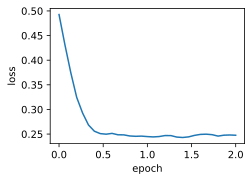

In [289]:
train_ch7(adam, init_adam_states(), 
          {'lr': 0.01, 't': 1}, 
          features, labels)

loss: 0.245678, 0.100562 sec per epoch
loss: 0.242415, 0.111224 sec per epoch


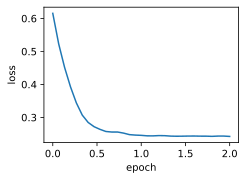

In [290]:
# 简洁实现
train_pytorch_ch7(torch.optim.Adam, 
                  {'lr': 0.01}, 
                  features, labels)